# An Exploratory Analysis of all of my blitz games in lichess up until Christmas Day, 2021

In [12]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(21,15))
sns.set(rc={"figure.figsize":(21, 15)})

import os
import uuid
from chessETL import ChessMachine

<Figure size 1512x1080 with 0 Axes>

In [2]:
# retrieve my chess games 
# path to where I store my data
data_dir = os.path.expanduser('~/Documents/code/chess-analysis/data/')
chesser = ChessMachine(data_dir + 'all_blitz_games_251221.pgn')
games_list = chesser.extractAllGames(data_dir + 'all_blitz_games_251221.pgn')
chess_games = chesser.loadGames(games_list)

Reading C:\Users\meler/Documents/code/chess-analysis/data/all_blitz_games_251221.pgn...
Extracting games...
File closed. Read 1358 games.
Loading games...
Loaded 1358 games.


In [3]:
chess_games

,GameKey,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,...,Opening,Termination,TimeControl,UTCDate,UTCTime,Variant,WhiteElo,WhiteRatingDiff,Game,Variation
0,de678e53-9247-5f42-8a5e-cec5475873b5,<2000 Blitz Arena,https://lichess.org/hPdONllo,2021.12.25,?,lei_nad,temirlan1979,1-0,1833,-9,...,Four Knights Game,Normal,180+2,2021.12.25,01:51:12,Standard,1586,+10,1. e4 e5 2. Nc3 Nc6 3. Nf3 Nf6 4. Bc4 Bc5 5. O...,Italian Variation
1,fb89fad0-d7e4-5550-a73e-bb4514e14193,<2000 Blitz Arena,https://lichess.org/pqeQmaCP,2021.12.25,?,yahya1761,lei_nad,1-0,1580,-2,...,Sicilian Defense,Normal,180+2,2021.12.25,01:35:10,Standard,1907,+2,1. e4 c5 2. Bc4 Nc6 3. a4 d6 4. h3 Nf6 5. Nc3 ...,Bowdler Attack
2,6cdc8bd7-4cc4-5d7b-ae59-aa26e5e61819,<2000 Blitz Arena,https://lichess.org/V8Bh7sFC,2021.12.25,?,lei_nad,Jenith29,0-1,1957,+1,...,Bongcloud Attack,Normal,180+2,2021.12.25,01:24:32,Standard,1587,-1,1. e4 e5 2. Ke2 Nc6 3. Nf3 Bc5 4. d3 d6 5. Be3...,NaN
3,b8ea568a-32d8-5f89-bba5-781f95d465e6,Rated Blitz game,https://lichess.org/K8CdaleP,2021.12.25,?,lei_nad,Jeffsign,1-0,1581,-5,...,Bongcloud Attack,Normal,300+3,2021.12.25,00:17:05,Standard,1588,+5,1. e4 e5 2. Ke2 Nc6 3. Nc3 d6 4. Nf3 Bg4 5. h3...,NaN
4,068f8ed1-d646-56e8-82a2-608830b40c35,<2000 Blitz Arena,https://lichess.org/9qHtlUap,2021.12.24,?,lei_nad,POR_MORFI,0-1,1672,+5,...,Sicilian Defense,Normal,180+2,2021.12.24,01:35:14,Standard,1579,-5,1. e4 c5 2. Nf3 g6 3. c3 d5 4. exd5 Qxd5 5. d4...,Hyperaccelerated Dragon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,71c56141-83bb-5ee0-8117-6d7efab1353e,Rated Blitz game,https://lichess.org/APAwhDH9,2020.09.28,?,lei_nad,papitjulu,0-1,1124,+6,...,Italian Game,Normal,300+3,2020.09.28,23:49:15,Standard,1109,-24,1. e4 e5 2. Nf3 Nc6 3. Bc4 d6 4. d3 Be6 5. Bxe...,NaN
1353,297c375a-b8d2-57b5-ac7e-f8af83cb01ad,Rated Blitz game,https://lichess.org/SAR92zTH,2020.09.25,?,albertokiese,lei_nad,1-0,1148,-37,...,Queen's Pawn Game,Normal,300+3,2020.09.25,22:48:24,Standard,1163,+6,1. d4 d5 2. Nf3 Nc6 3. Bf4 e6 4. e3 Nf6 5. Nc3...,Chigorin Variation
1354,df1d081f-07ed-56dc-bb4c-08e3867afb7e,Rated Blitz game,https://lichess.org/vIp8E3vu,2020.09.25,?,lei_nad,rodikx,1-0,1051,-6,...,Italian Game,Normal,300+3,2020.09.25,20:38:40,Standard,999,+66,1. e4 e5 2. Nf3 Nc6 3. Bc4 h6 4. d3 Nf6 5. Nc3...,Anti-Fried Liver Defense
1355,abdc5d27-e8d9-541e-9e51-56822f6ac483,Rated Blitz game,https://lichess.org/2ahtft74,2020.09.24,?,Jon61570,lei_nad,0-1,993,+82,...,Queen's Pawn Game,Normal,180+2,2020.09.24,22:11:20,Standard,990,-5,1. d4 Nc6 2. Nf3 d5 3. e3 e6 4. c4 dxc4 5. Bxc...,Chigorin Variation


In [4]:
# Add a column for whether I won or not 
def didIWin(row):
    if row['Result'] == '1-0':
        if row['White'] == 'lei_nad': 
            return 'Victory'
        else:
            return 'Defeat'
            
    if row['Result'] == '0-1':
        if row['Black'] == 'lei_nad':
            return 'Victory'
        else:
            return 'Defeat'
    
    elif row['Result'] == '1/2-1/2':
        return 'Draw'

    else:
        return np.nan 

In [5]:
chess_games['myResult'] = chess_games.apply(lambda row: didIWin(row), axis=1)

In [6]:
chess_games['myResult'].value_counts()

Victory    728
Defeat     579
Draw        50
Name: myResult, dtype: int64

In [23]:
top10openings = chess_games.groupby('Opening').count().sort_values(by='GameKey',ascending=False).head(10)
top10openings

,GameKey,Event,Site,Date,Round,White,Black,Result,BlackElo,BlackRatingDiff,...,Termination,TimeControl,UTCDate,UTCTime,Variant,WhiteElo,WhiteRatingDiff,Game,Variation,myResult
Opening,,,,,,,,,,,,,,,,,,,,,
Sicilian Defense,367,367,367,367,367,367,367,367,367,367,...,367,367,367,367,367,367,367,367,350,367
Ruy Lopez,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,107,110
Italian Game,103,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,91,103
Vienna Game,101,101,101,101,101,101,101,101,101,101,...,101,101,101,101,101,101,101,101,81,101
Queen's Gambit Declined,56,56,56,56,56,56,56,56,56,56,...,56,56,56,56,56,56,56,56,53,56
Russian Game,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,48,53
French Defense,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,49,51
Indian Defense,49,49,49,49,49,49,49,49,49,49,...,49,49,49,49,49,49,49,49,14,49
Scandinavian Defense,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,36,43


[Text(0.5, 1.0, 'My Blitz Games by Opening')]

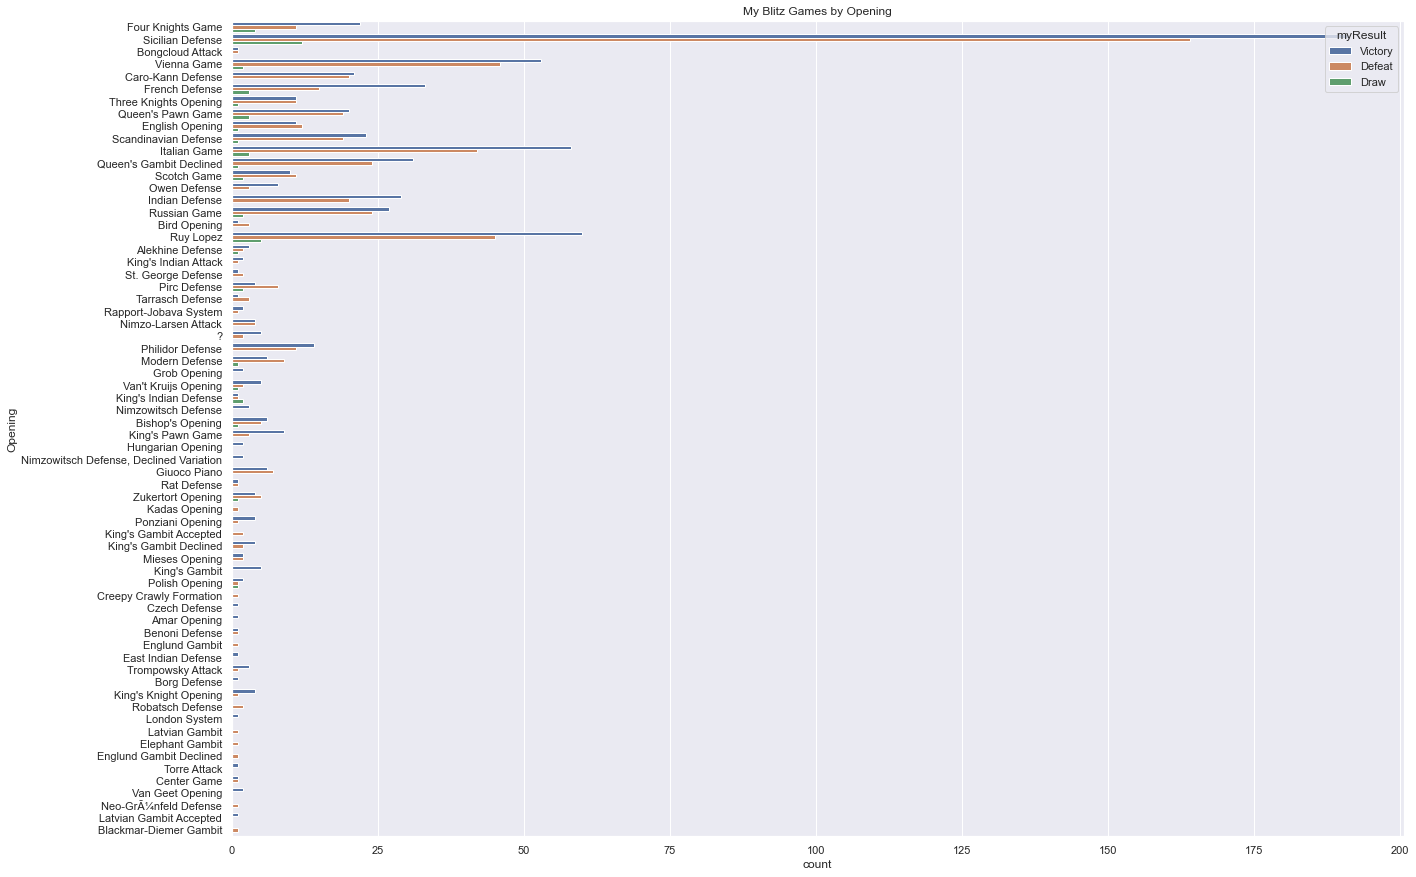

In [25]:
sns.countplot(data=chess_games, y='Opening',hue='myResult').set(title='My Blitz Games by Opening')

In [27]:
sicilian_games = chess_games[chess_games['Opening'] == 'Sicilian Defense']
my_sicilian_games = sicilian_games[sicilian_games['Black'] == 'lei_nad']

[Text(0.5, 1.0, 'My Sicilian Games by Variation')]

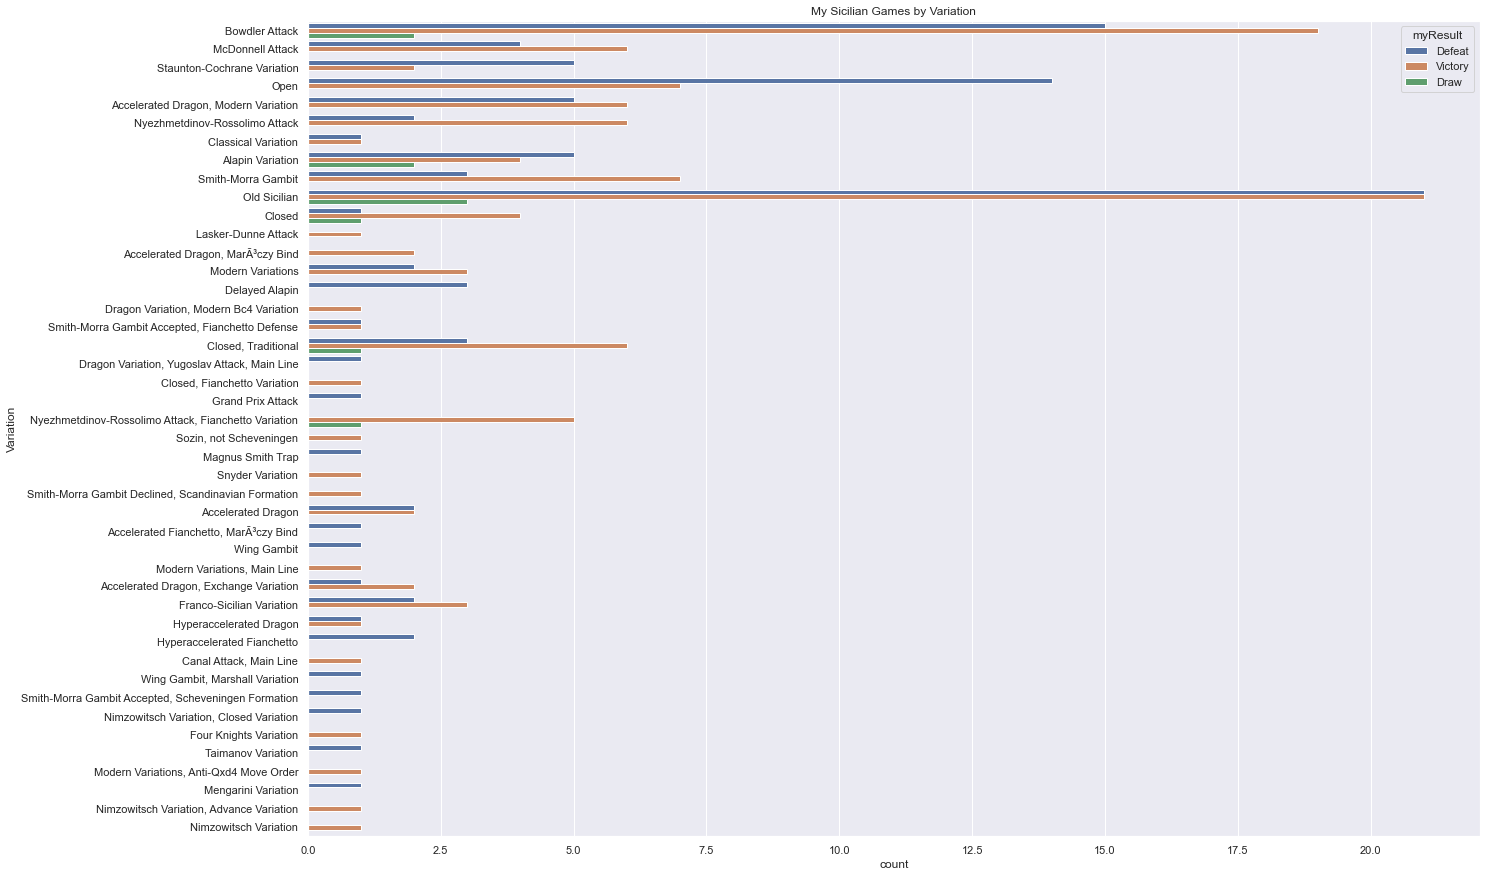

In [28]:
sns.countplot(data=my_sicilian_games, y='Variation', hue='myResult').set(title='My Sicilian Games by Variation')